DOGRUSAL OLMAYAN REGRESYON MODELLERİ

K-EN YAKIN KOMŞU (KNN)

In [1]:
#tahminler gözlem benzerliğine göre yapılır

In [2]:
#en yakın K adet gözlemin y değerlerinin ortalaması alınır

In [3]:
#öklid ya da benzeri bir uzaklık hesabı ile her bir gözeleme uzaklık hesaplanır

KNN-MODEL

In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [6]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [7]:
knn_model

KNeighborsRegressor()

In [8]:
knn_model.n_neighbors

5

KNN-TAHMİN

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [11]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## KNN - MODEL TUNING

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
knn_params = {"n_neighbors": np.arange(1, 30, 1)}

In [14]:
knn = KNeighborsRegressor()

In [15]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [16]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
knn_cv_model.best_params_["n_neighbors"]

8

In [18]:
RMSE = [] 
RMSE_CV = []
for k in range(29):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154
k = 11 için RMSE değeri:  272.18349695209093 RMSE_CV değeri:  303.92921781630935
k = 12 için RMSE değeri:  274.0811032528632 RMSE_CV değeri:  307.2016006599871
k = 13 için RMSE değeri:  279.9714413379922 RMSE_CV değeri:  303.

In [19]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [20]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [21]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR

In [22]:
#amaç bir marjin aralığına maksimum noktayı en küçük haya ile alabilecek şekilde doğru ya da eğriyi belirlemektir

# SVR MODEL

In [23]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [24]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [25]:
from sklearn.svm import SVR


In [26]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [27]:
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [28]:
svr_model.predict(X_train)

array([ 403.52804878,  666.91219512,  706.66829268,  194.80853659,
        423.40609756,  666.91219512,  150.08292683,  304.13780488,
        507.88780488,  815.99756098,  801.08902439,  706.66829268,
        731.51585366,  537.70487805,  741.45487805,  562.55243902,
        652.00365854,  145.11341463,  -28.8195122 ,  413.46707317,
        761.33292683,  428.37560976,  463.16219512,  353.83292683,
        219.65609756,  478.07073171,  497.94878049,  328.98536585,
        378.6804878 ,  145.11341463,  135.17439024,  542.67439024,
        681.82073171,  229.59512195,  279.2902439 ,  358.80243902,
        373.71097561,  801.08902439,  463.16219512,  219.65609756,
        155.05243902,  249.47317073,  234.56463415,  194.80853659,
        239.53414634,  746.42439024,  666.91219512,  532.73536585,
        314.07682927,  160.02195122,  368.74146341,  706.66829268,
        637.09512195,  656.97317073,  607.27804878,  622.18658537,
        338.92439024,  691.7597561 ,  378.6804878 ,  701.69878

In [29]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [30]:
X_train["Hits"]

183     91.0
229    144.0
286    152.0
102     49.0
153     95.0
       ...  
24     168.0
236     52.0
93     138.0
137    103.0
133     99.0
Name: Hits, Length: 197, dtype: float64

In [31]:
-48.7 + 5*144

671.3

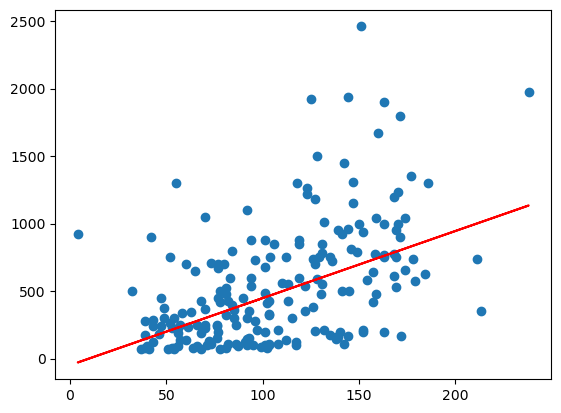

In [32]:
y_pred = svr_model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r")

In [33]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [34]:
 -8.814095480334572 + 5.1724561354706875*144

736.0195880274445

Text(0, 0.5, 'Maaş (Salary)')

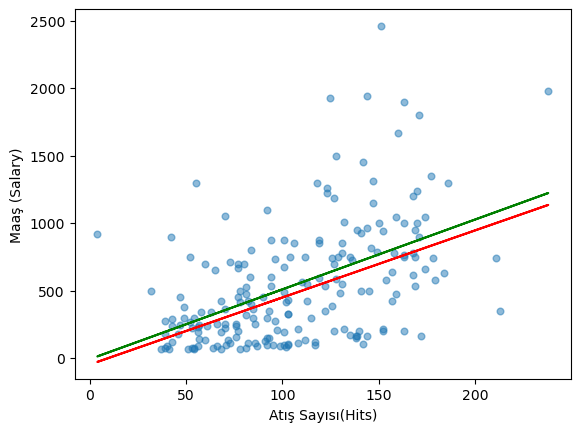

In [35]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

# SVR TAHMİN

In [36]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [37]:
svr_model.predict([[91]])

array([403.52804878])

In [38]:
y_pred = svr_model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

# MODEL TUNING

In [40]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}

In [41]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [42]:
svr_cv_model.best_params_

{'C': 0.1}

In [43]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [44]:
svr_tuned = SVR(kernel = "linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [45]:
y_pred = svr_tuned.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# DOĞRUSAL OLMAYAN SVR

In [47]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [48]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel = 'rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

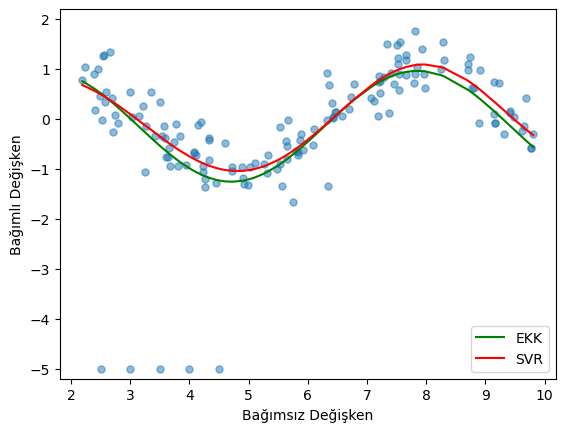

In [49]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [50]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [51]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

# TAHMİN

In [52]:
y_pred = svr_rbf.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

# MODEL TUNING

In [54]:
svr_rbf

SVR()

In [55]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [56]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [57]:
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [58]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# YAPAY SİNİR AĞLARI

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

# Model

In [59]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [62]:
X_train_scaled = scaler.transform(X_train)

In [63]:
X_test_scaled = scaler.transform(X_test)

In [64]:
from sklearn.neural_network import MLPRegressor

In [65]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [66]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [67]:
mlp_model.n_layers_

4

In [68]:
mlp_model.hidden_layer_sizes

(100, 20)

# Tahmin

In [69]:
y_pred = mlp_model.predict(X_test_scaled)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

527.4270090447499

# Model Tuning

In [71]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [72]:
mlp_params = {"alpha":[0.1, 0.01, 0.02, 0.005],
              "hidden_layer_sizes": [(20, 20), (100, 50, 150), (300, 200, 150)],
              "activation": ['relu', 'logistic']}

In [73]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [74]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [75]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [76]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100, 50, 150))

In [77]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [78]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.77739022461884

# REGRESYON AĞAÇLARI (CART)

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır

# Model

In [80]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [81]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [82]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [83]:
cart_model

DecisionTreeRegressor()

In [84]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

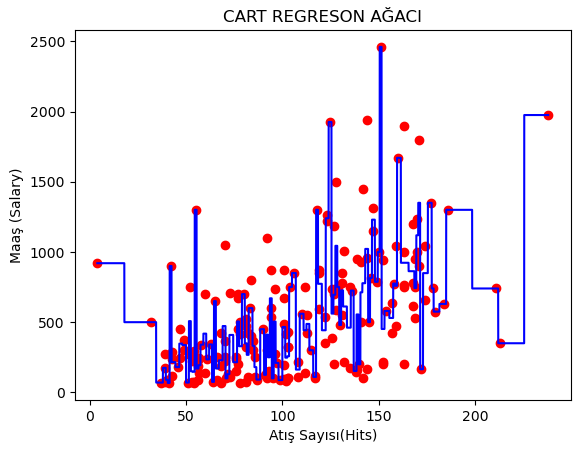

In [85]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [86]:
#!pip install skompiler

In [87]:
pip install skompiler

Note: you may need to restart the kernel to use updated packages.


In [88]:
from skompiler import skompile

In [89]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


In [90]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

# Tahmin

In [91]:
x = [91]

In [92]:
((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else ((((328.88899999999995 if x[0] <= 79.0 else 700.0) if 
    x[0] <= 80.5 else 348.75 if x[0] <= 81.5 else 267.5) if x[0] <= 82.5 else
    600.0 if x[0] <= 83.5 else 600.0) if x[0] <= 84.5 else (331.25 if x[0] <=
    85.5 else (180.0 if x[0] <= 86.5 else 91.5) if x[0] <= 88.5 else 450.0 if
    x[0] <= 90.5 else 125.0) if x[0] <= 91.5 else 411.25 if x[0] <= 92.5 else
    250.0) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else ((100.0 if x[0] <=
    95.5 else 504.1665) if x[0] <= 96.5 else 210.0 if x[0] <= 98.0 else 
    87.5) if x[0] <= 100.0 else 466.0) if x[0] <= 101.5 else 247.5 if x[0] <=
    102.5 else 257.3334) if x[0] <= 103.5 else (750.0 if x[0] <= 105.0 else
    850.0) if x[0] <= 107.0 else 162.5 if x[0] <= 109.0 else (560.0 if x[0] <=
    111.0 else 442.5 if x[0] <= 112.5 else 487.5) if x[0] <= 114.0 else 
    300.0) if x[0] <= 116.0 else 110.0) if x[0] <= 117.5 else ((((1300.0 if
    x[0] <= 118.5 else 773.3333333333334 if x[0] <= 120.5 else 442.5) if x[
    0] <= 122.5 else 1240.0 if x[0] <= 124.0 else 1925.571) if x[0] <= 
    125.5 else (561.25 if x[0] <= 126.5 else (695.2776666666667 if x[0] <= 
    127.5 else 1043.75) if x[0] <= 128.5 else (750.0 if x[0] <= 129.5 else 
    480.0) if x[0] <= 130.5 else 726.6666666666666) if x[0] <= 131.5 else (
    ((611.6665 if x[0] <= 133.5 else 461.0) if x[0] <= 135.5 else 725.0) if
    x[0] <= 137.0 else 152.5 if x[0] <= 138.5 else 555.0 if x[0] <= 139.5 else
    200.0) if x[0] <= 140.5 else 712.5 if x[0] <= 141.5 else 777.5) if x[0] <=
    143.0 else (((1021.6666666666666 if x[0] <= 144.5 else 500.0 if x[0] <=
    145.5 else 815.0) if x[0] <= 146.5 else 1230.0 if x[0] <= 148.0 else 
    787.5 if x[0] <= 149.5 else 1000.0) if x[0] <= 150.5 else 2460.0) if x[
    0] <= 151.5 else (451.6666666666667 if x[0] <= 153.0 else 580.0 if x[0] <=
    155.5 else 530.0) if x[0] <= 157.5 else (((((775.0 if x[0] <= 158.5 else
    759.1665) if x[0] <= 159.5 else 1670.0 if x[0] <= 161.5 else 923.0 if x
    [0] <= 165.5 else 863.0556666666666) if x[0] <= 168.5 else 
    743.3333333333334) if x[0] <= 169.5 else 1118.75 if x[0] <= 170.5 else 
    1350.0) if x[0] <= 171.5 else 165.0 if x[0] <= 173.0 else (849.3335 if 
    x[0] <= 175.5 else 1350.0) if x[0] <= 177.5 else (740.0 if x[0] <= 
    178.5 else 575.0 if x[0] <= 181.5 else 630.0) if x[0] <= 185.0 else 
    1300.0 if x[0] <= 198.5 else 740.0) if x[0] <= 212.0 else 350.0) if x[0
    ] <= 225.5 else 1975.0)


125.0

In [93]:
cart_model.predict([[91]])

array([125.])

In [94]:
y_pred = cart_model.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

# Model Tuning

In [96]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [97]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [98]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [99]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [100]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [101]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [102]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [103]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [104]:
y_pred = cart_tuned.predict(X_test)

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

In [106]:
print(skompile(cart_tuned.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else (178.92857142857142 if x[0] <= 41.5 else 
    308.8623260869565) if x[0] <= 76.5 else 390.71945 if x[0] <= 116.0 else
    110.0) if x[0] <= 117.5 else (716.6210571428571 if x[0] <= 143.0 else 
    1108.75 if x[0] <= 151.5 else 825.1047714285714) if x[0] <= 225.5 else 
    1975.0)



In [107]:
x = [91]

In [108]:
((920.0 if x[0] <= 18.0 else 291.70126415094336 if x[0] <= 76.5 else 
    381.66398387096774) if x[0] <= 117.5 else (716.6210571428571 if x[0] <=
    143.0 else 888.1370444444444) if x[0] <= 225.5 else 1975.0)


381.66398387096774

# BAGGING

Temeli boostsrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

# Model

In [109]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [110]:
bag_model = BaggingRegressor(bootstrap_features = True)

In [111]:
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [112]:
bag_model.n_estimators

10

In [113]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1875850171),
 DecisionTreeRegressor(random_state=1686320658),
 DecisionTreeRegressor(random_state=2106270115),
 DecisionTreeRegressor(random_state=604160287),
 DecisionTreeRegressor(random_state=1818112300),
 DecisionTreeRegressor(random_state=1144551074),
 DecisionTreeRegressor(random_state=1634764234),
 DecisionTreeRegressor(random_state=820974251),
 DecisionTreeRegressor(random_state=1387516839),
 DecisionTreeRegressor(random_state=2009973545)]

In [115]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=1875850171)

# Tahmin

In [116]:
y_pred = bag_model.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test, y_pred))

329.4424429776916

In [118]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

530.8569840261865

# Model Tuning

In [120]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [121]:
bag_params = {"n_estimators": range(2, 20)}

In [122]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [123]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [124]:
bag_cv_model.best_params_

{'n_estimators': 5}

In [125]:
bag_tuned = BaggingRegressor(n_estimators = 5, random_state = 45)

In [126]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=5, random_state=45)

In [127]:
y_pred = bag_tuned.predict(X_test)

In [128]:
np.sqrt(mean_squared_error(y_test, y_pred))

370.1676411495342

# RANDOM FORESTS

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

# Model

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rf_model = RandomForestRegressor(random_state = 42)

In [133]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Tahmin

In [134]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [135]:
y_pred = rf_model.predict(X_test)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

# Model Tuning

In [137]:
rf_params = {"max_depth": list(range(1,10)),
             "max_features": [3, 5, 10, 15],
             "n_estimators": [100, 200, 500, 1000, 2000]}

In [139]:
rf_model = RandomForestRegressor(random_state = 42)

In [140]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)

In [141]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [142]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [143]:
rf_tuned = RandomForestRegressor(max_depth = 8,
                                 max_features = 3,
                                 n_estimators = 200)

In [144]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [145]:
y_pred = rf_tuned.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.6939662734028

In [147]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

<AxesSubplot:>

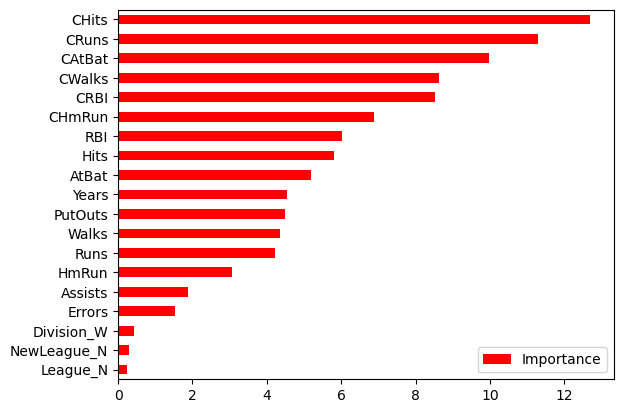

In [148]:
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "r")

# GRAIDENT BOOSTING MACHINES

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

# Model

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
gbm_model = GradientBoostingRegressor()

In [7]:
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

# Tahmin

In [8]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.61898547797074

# Model Tuning

In [9]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [10]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.75}

In [14]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 3, 
                                      n_estimators = 100, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [15]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

341.91660482749114

In [16]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

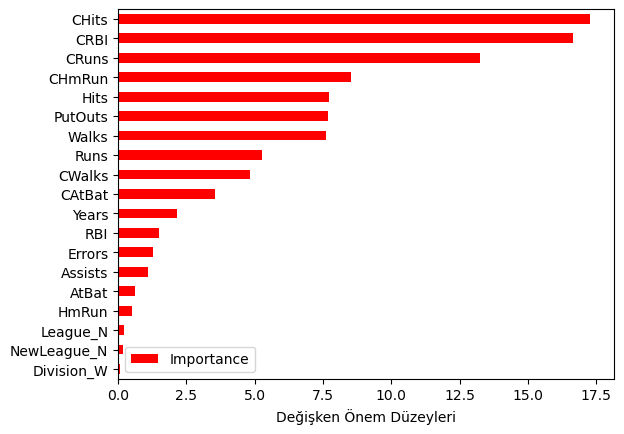

In [17]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBOOST

XGBOOST, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

# Model

In [18]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [19]:
pip install xgboost

     -------------------------------------- 99.7/99.7 MB 519.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
import xgboost as xgb

In [29]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [30]:
from xgboost import XGBRegressor

In [34]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# Tahmin

In [35]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

# Model Tuning

In [36]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [38]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
        

In [39]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [40]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [41]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

343.6101991802883

# LightGBM

LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GMB türüdür.

# Model

In [42]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [43]:
pip install lightgbm


     ---------------------------------------- 1.3/1.3 MB 1.0 MB/s eta 0:00:00


In [45]:
from lightgbm import LGBMRegressor

In [46]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# Tahmin

In [47]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

# Model Tuning

In [49]:
lgbm_model

LGBMRegressor()

In [50]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [51]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [52]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [56]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [57]:
y_pred = lgbm_tuned.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

# CATBOOST

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GMB türevidir.

# Model

In [59]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [60]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
from catboost import CatBoostRegressor

In [62]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 138ms	remaining: 2m 17s
1:	learn: 431.3923642	total: 140ms	remaining: 1m 9s
2:	learn: 424.8820360	total: 142ms	remaining: 47.1s
3:	learn: 418.2514904	total: 143ms	remaining: 35.5s
4:	learn: 412.6394021	total: 144ms	remaining: 28.6s
5:	learn: 406.6247020	total: 144ms	remaining: 23.9s
6:	learn: 400.5321206	total: 145ms	remaining: 20.6s
7:	learn: 394.6683437	total: 146ms	remaining: 18.1s
8:	learn: 388.2496484	total: 147ms	remaining: 16.1s
9:	learn: 382.9448842	total: 148ms	remaining: 14.6s
10:	learn: 377.2600080	total: 148ms	remaining: 13.3s
11:	learn: 372.4829606	total: 149ms	remaining: 12.3s
12:	learn: 366.6823437	total: 150ms	remaining: 11.4s
13:	learn: 362.6076230	total: 151ms	remaining: 10.6s
14:	learn: 358.0107745	total: 151ms	remaining: 9.95s
15:	learn: 353.2802665	total: 152ms	remaining: 9.36s
16:	learn: 348.5646265	total: 153ms	remaining: 8.85s
17:	learn: 343.6407912	total: 154ms	remaining: 8.39s
18:	learn: 339.2363847	to

# Tahmin

In [63]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

# Model Tuning

In [64]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [65]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [1]:
#catb_cv_model.fit(X_train, y_train)

In [3]:
#catb_cv_model.best_params_

In [4]:
#catb_tuned = CatBoostRegressor(iterations = 200, 
                               #learning_rate = 0.01, 
                               #depth = 8)

#catb_tuned = catb_tuned.fit(X_train,y_train)

In [5]:
#y_pred = catb_tuned.predict(X_test)
#np.sqrt(mean_squared_error(y_test, y_pred))